<a href="https://colab.research.google.com/github/Saurav1934/Main-Flow-5/blob/main/Main_Flow_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
# Load Dataset
df = pd.read_csv("student_performance_prediction.csv")

In [18]:
# Data Preprocessing
df = df[['Study Hours per Week', 'Attendance Rate', 'Passed']]
df = df.rename(columns={'Study Hours per Week': 'Study_Hours', 'Attendance Rate': 'Attendance', 'Passed': 'Pass'})

df.dropna(inplace=True)
df['Pass'] = df['Pass'].map({'Yes': 1, 'No': 0})

Missing values:
Study_Hours    0
Attendance     0
Pass           0
dtype: int64


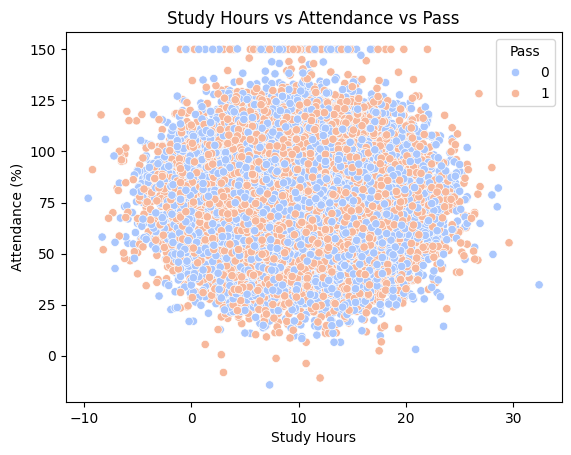

In [19]:
# Data Exploration
print("Missing values:")
print(df.isnull().sum())

# Plot Relationship
sns.scatterplot(x=df['Study_Hours'], y=df['Attendance'], hue=df['Pass'], palette='coolwarm')
plt.xlabel("Study Hours")
plt.ylabel("Attendance (%)")
plt.title("Study Hours vs Attendance vs Pass")
plt.show()

In [20]:
# Train-Test Split
X = df[['Study_Hours', 'Attendance']]
y = df['Pass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.505174172861099
Confusion Matrix:
 [[1624 1811]
 [1584 1842]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.47      0.49      3435
           1       0.50      0.54      0.52      3426

    accuracy                           0.51      6861
   macro avg       0.51      0.51      0.50      6861
weighted avg       0.51      0.51      0.50      6861

